<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml1027/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [3]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


5


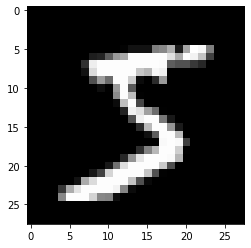

In [4]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# _r: reverse
import matplotlib.pyplot as plt
print(y_train[0])
plt.imshow(x_train[0], cmap="gray")

In [15]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
# Dense: 全連接層
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


if os.path.exists("mnist.h5"):
    print("已有存檔, 讀取...")
    model = load_model("mnist.h5")
else:
    print("沒有存檔, 建個新的...")
    layers = [
        # 784 * 128 + 128(bias)
        Dense(128, activation="relu", input_dim=784),
        # 128 * 10 + 10(bias)
        Dense(10, activation="softmax")
    ]
    model = Sequential(layers)
    model.compile(loss=CategoricalCrossentropy(),
              # "adam"也可以
              optimizer=Adam(),
              metrics=["accuracy"])
model.summary()

沒有存檔, 建個新的...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 一個輸出(二元分類): BinaryCrossEntropy p log 1/q + (1 - p) log 1/1-q
# 多個輸出(多元分類): CategoricalCrossEntropy pi log1/qi
# from tensorflow.keras.losses import CategoricalCrossentropy
# from tensorflow.keras.optimizers import Adam
# model.compile(loss=CategoricalCrossentropy(),
#               # "adam"也可以
#               optimizer=Adam(),
#               metrics=["accuracy"])

In [7]:
# 對y來說, 你要做one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# 你可以把一個位置換-1, 代表讓numpy幫你算多少
# x_train.reshape(-1, 784) / 255.0
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0
# x_train_norm[0]

In [9]:
# batch_size: 看多少筆, 做一次梯度下降(幾10~幾100)
# epochs: 所有資料看幾輪(負責結束訓練)
# batch_size=200
# 一epochs: 54000 / 200 = 270(次梯度下降)
# verbose=0(quiet) 1(default) 2(no bar)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("mnist.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train_cat,
          batch_size=200,
          epochs=5000,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/5000
270/270 - 2s - loss: 0.4499 - accuracy: 0.8790 - val_loss: 0.1987 - val_accuracy: 0.9473 - 2s/epoch - 7ms/step
Epoch 2/5000
270/270 - 1s - loss: 0.2021 - accuracy: 0.9424 - val_loss: 0.1409 - val_accuracy: 0.9627 - 1s/epoch - 4ms/step
Epoch 3/5000
270/270 - 1s - loss: 0.1494 - accuracy: 0.9576 - val_loss: 0.1174 - val_accuracy: 0.9680 - 1s/epoch - 4ms/step
Epoch 4/5000
270/270 - 1s - loss: 0.1180 - accuracy: 0.9654 - val_loss: 0.1041 - val_accuracy: 0.9725 - 1s/epoch - 4ms/step
Epoch 5/5000
270/270 - 1s - loss: 0.0970 - accuracy: 0.9724 - val_loss: 0.0948 - val_accuracy: 0.9735 - 1s/epoch - 4ms/step
Epoch 6/5000
270/270 - 1s - loss: 0.0825 - accuracy: 0.9767 - val_loss: 0.0893 - val_accuracy: 0.9752 - 1s/epoch - 4ms/step
Epoch 7/5000
270/270 - 1s - loss: 0.0698 - accuracy: 0.9804 - val_loss: 0.0852 - val_accuracy: 0.9770 - 1s/epoch - 4ms/step
Epoch 8/5000
270/270 - 1s - loss: 0.0603 - accuracy: 0.9831 - val_loss: 0.0809 - val_accuracy: 0.9790 - 1s/epoch - 4ms/step
Epoch 9/

In [10]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9774


[0.07627811282873154, 0.977400004863739]

In [11]:
# keras: y_test_cat sklearn: y_test
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
             index=["{}(正確)".format(i) for i in range(10)],
             columns=["{}(預測)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),970,1,1,0,1,2,3,1,1,0
1(正確),0,1123,3,2,0,1,2,0,4,0
2(正確),6,1,1006,3,1,0,2,2,9,2
3(正確),0,0,1,996,0,2,1,2,5,3
4(正確),1,0,2,0,959,0,5,1,2,12
5(正確),2,0,0,11,2,867,4,1,3,2
6(正確),6,2,2,1,2,3,938,1,3,0
7(正確),2,4,11,2,1,0,0,999,2,7
8(正確),4,1,5,8,6,4,3,3,938,2
9(正確),2,3,1,6,7,5,1,4,2,978


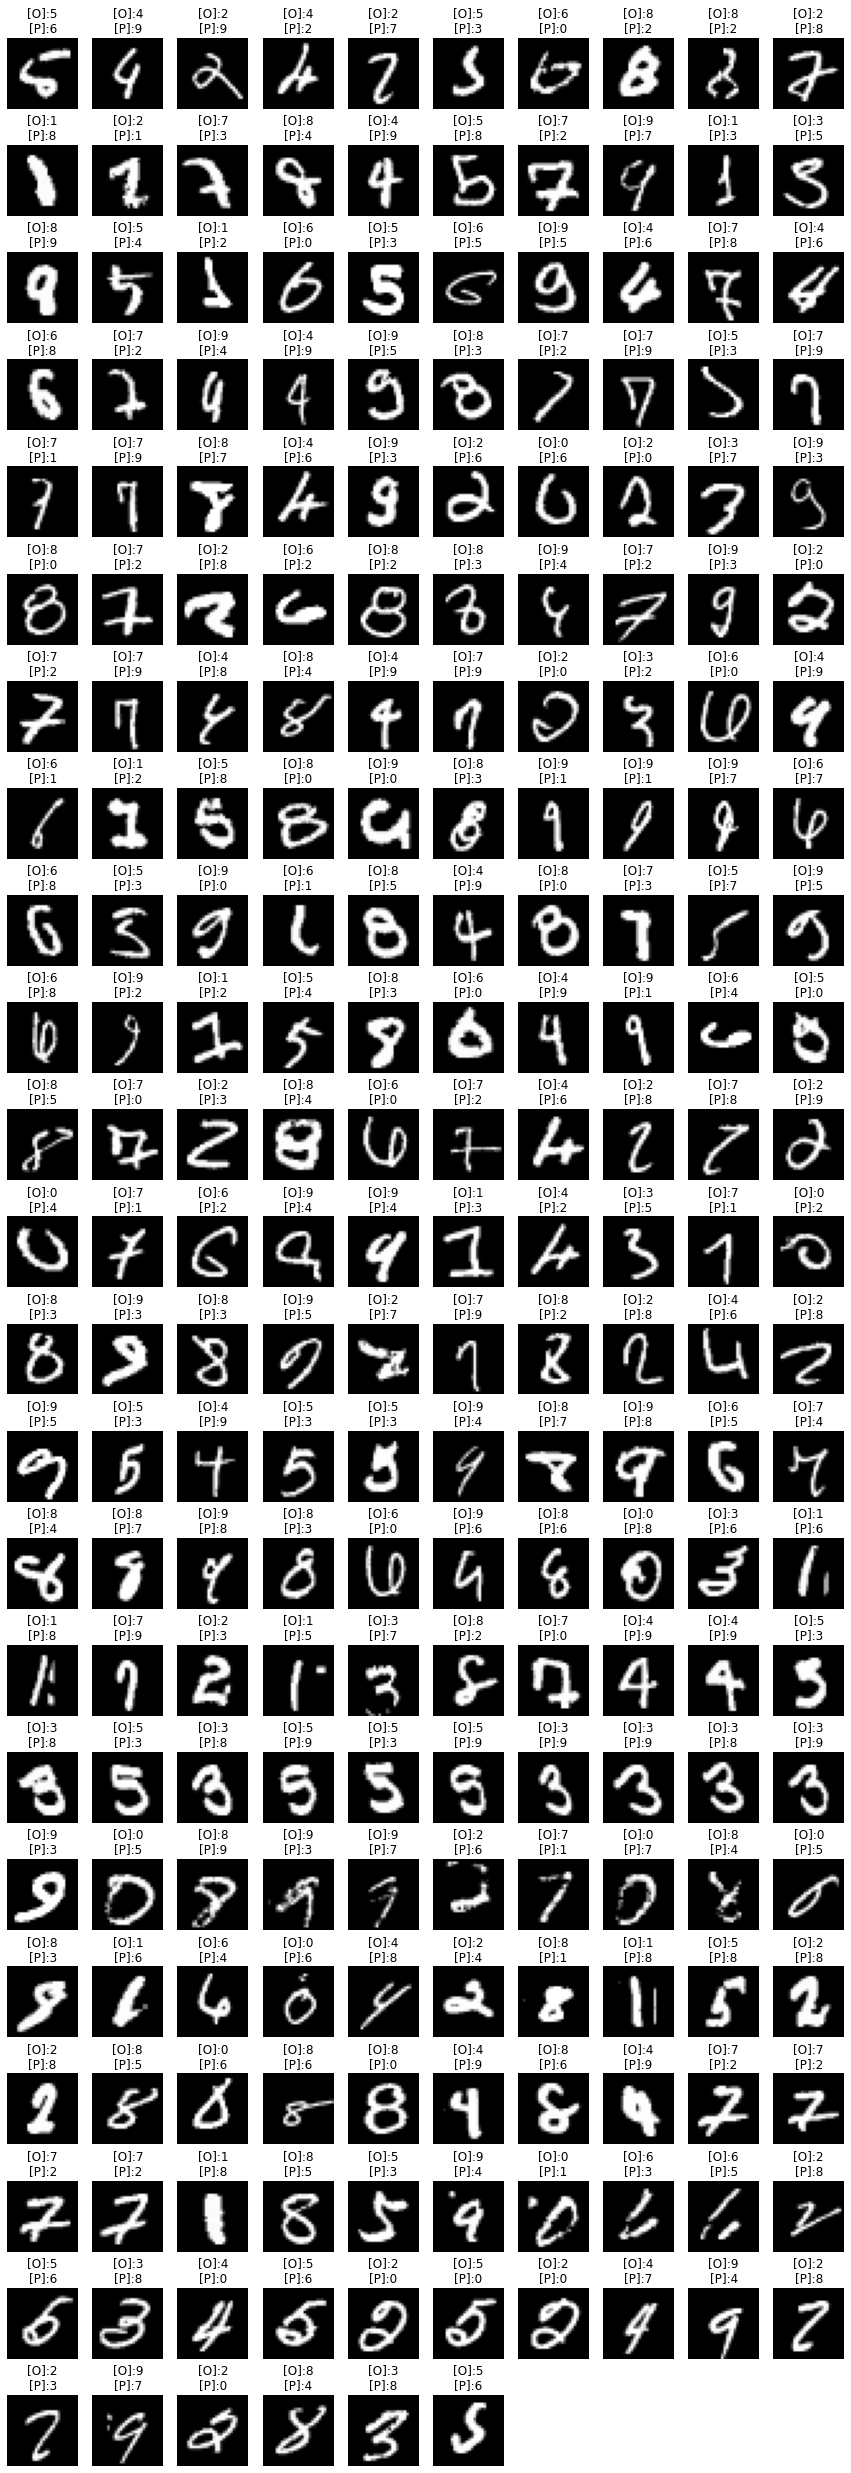

In [12]:
import numpy as np
# 找出True(預測錯誤)的位置
idx = np.nonzero(pre != y_test)[0]
pre_false_label = y_test[idx]
pre_false_pre = pre[idx]
pre_false_img = x_test[idx]

plt.figure(figsize=(15, 45))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(pre_false_label[i], pre_false_pre[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i], cmap="gray")

In [13]:
# 手動存檔: model.save("2021_11_18_mnist.h5")
# 手動讀檔: from tensorflow.keras.models import load_model
# load_model("h5")
# 不需要再次compile, 可以直接繼續fit/predict

(array([0, 1]), array([0, 0]))